<a href="https://colab.research.google.com/github/Nebulosa-max/data_analysis_assignment/blob/main/penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['target'] = wine.target

print("Shape of dataset:", df.shape)
print("\nFirst 3 rows:\n", df.head(3))
print("\nLast 3 rows:\n", df.tail(3))
print("\nFeature names:\n", wine.feature_names)
print("\nTarget names:\n", wine.target_names)

Shape of dataset: (178, 14)

First 3 rows:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  

Last 3 rows:
      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
175    13.27        4.28  2.26  

In [6]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()

# Create the DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the 'target' as a new column
df['class'] = wine.target

# Optional: see the first few rows
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
# Group the data by wine class
grouped = df.groupby('class')

# Calculate mean, std, and range for each class
mean_values = grouped.mean()
std_values = grouped.std()
range_values = grouped.max() - grouped.min()

# Display the results
print("Mean Values:\n", mean_values, "\n")
print("Standard Deviations:\n", std_values, "\n")
print("Ranges:\n", range_values)

Mean Values:
          alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
class                                                                   
0      13.744746    2.010678  2.455593          17.037288  106.338983   
1      12.278732    1.932676  2.244789          20.238028   94.549296   
2      13.153750    3.333750  2.437083          21.416667   99.312500   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
class                                                                     
0           2.840169    2.982373              0.290000         1.899322   
1           2.258873    2.080845              0.363662         1.630282   
2           1.678750    0.781458              0.447500         1.153542   

       color_intensity       hue  od280/od315_of_diluted_wines      proline  
class                                                                        
0             5.528305  1.062034                      3.157797  1115.711864  
1         

<Figure size 1200x600 with 0 Axes>

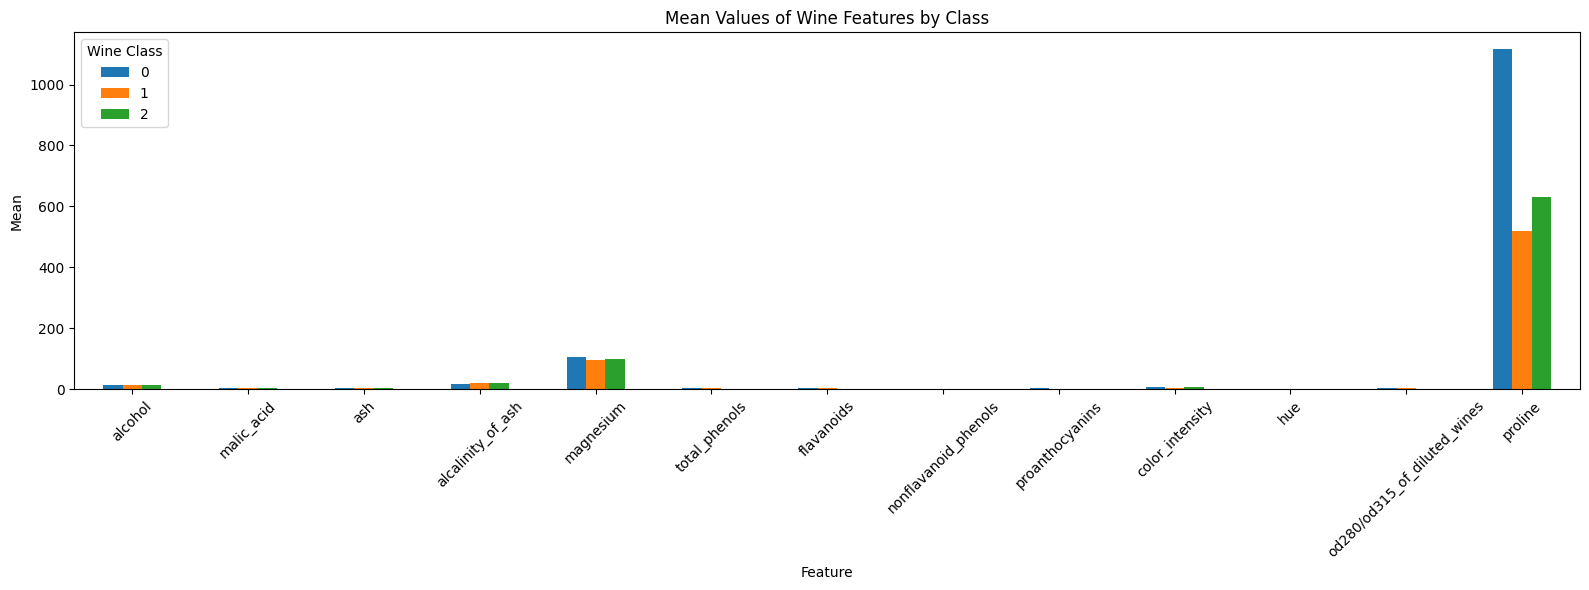

In [8]:
import matplotlib.pyplot as plt

# Set up figure size
plt.figure(figsize=(12, 6))

# Calculate the mean values grouped by wine class
grouped_means = df.groupby('class').mean().T  # Transpose so features are rows

# Create the bar plot
grouped_means.plot(kind='bar', figsize=(16, 6))

# Add labels and title
plt.title("Mean Values of Wine Features by Class")
plt.ylabel("Mean")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.legend(title='Wine Class')
plt.tight_layout()
plt.show()

### Problem 3 – Feature Distributions

The histograms below show the distribution of 4 selected features from the Wine dataset:
- **Alcohol**
- **Malic Acid**
- **Color Intensity**
- **Proline**

These visualisations help identify patterns and possible outliers across the dataset.  
Alcohol and proline appear to be right-skewed, indicating that most wines have lower values but a few with very high levels.  
Malic acid is more balanced, while color intensity is somewhat spread out.  
Visualising feature distributions is an important part of data exploration, as it reveals underlying trends and variability.

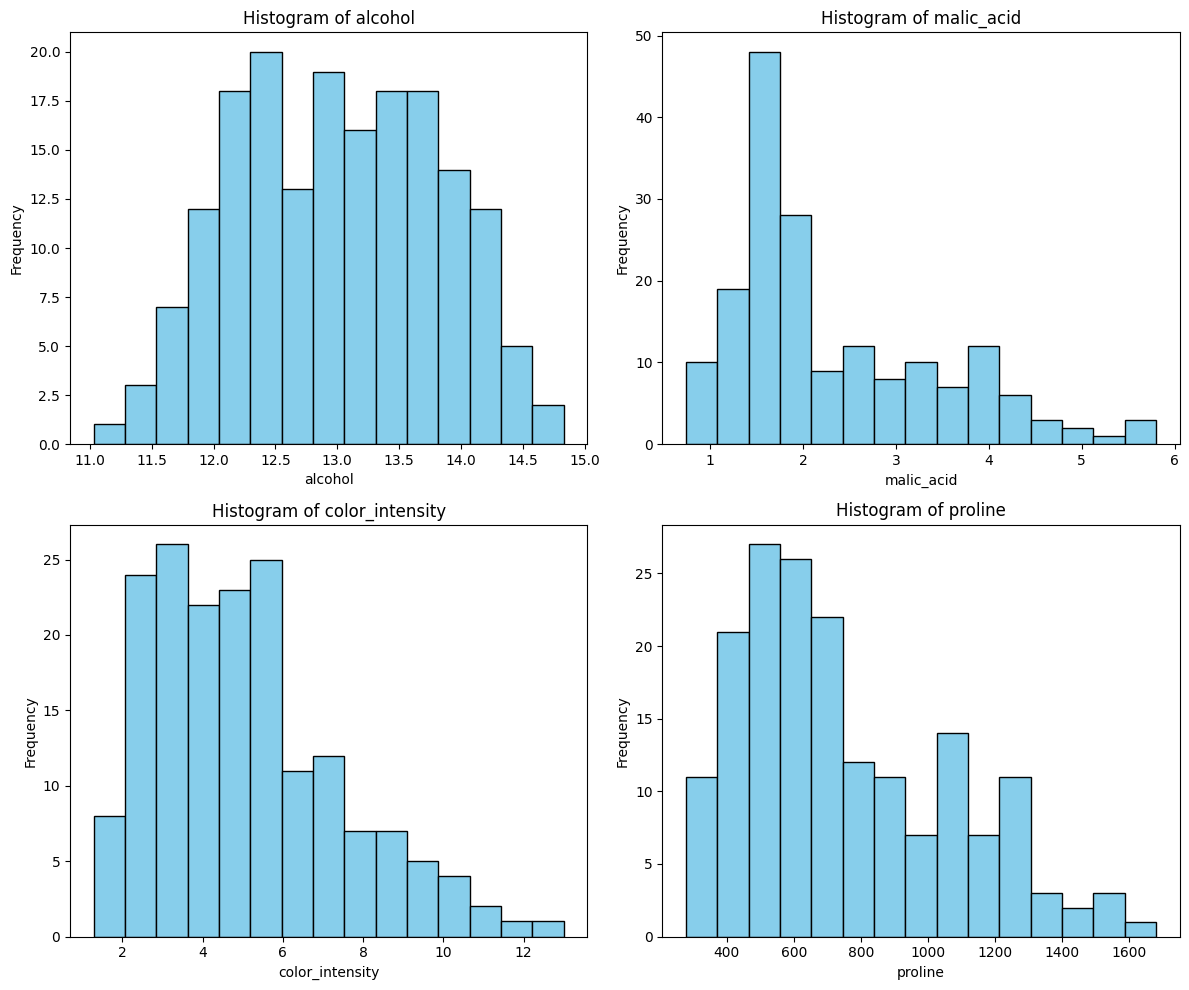

In [10]:
import matplotlib.pyplot as plt

# Choose 4 features to visualise
features = ['alcohol', 'malic_acid', 'color_intensity', 'proline']

# Set up the plot area
plt.figure(figsize=(12, 10))

# Loop through features and create subplots
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  # 2x2 grid
    plt.hist(df[feature], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Problem 4 – Feature Relationship (Scatter Plot)

This scatter plot compares the features **Flavanoids** and **Alcohol**, with each point representing a wine sample.

The colours indicate wine classes (0, 1, 2), and we can observe that:

- Class 0 wines tend to have higher flavanoid levels and alcohol content.
- Class 2 wines show more overlap but cluster lower on flavanoids.
- Class 1 appears more scattered, with lower flavanoid concentration.

This type of visualisation helps identify which features are useful for classifying wines, as we can see how well-separated the groups are.

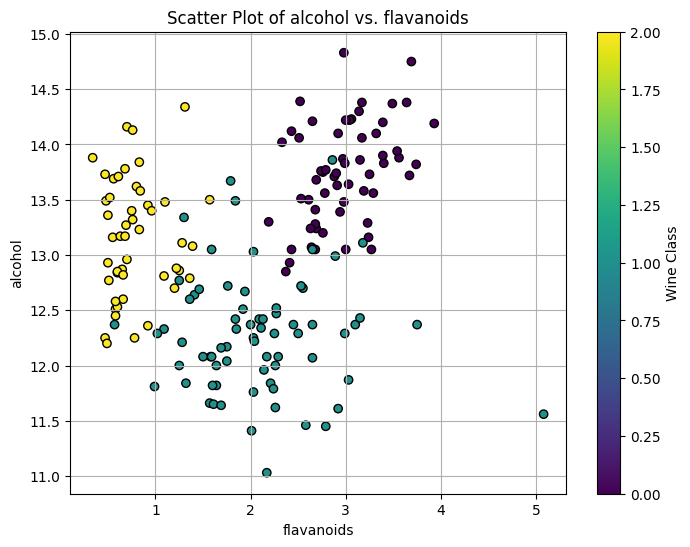

In [11]:

import matplotlib.pyplot as plt

# Choose two features to compare
x_feature = 'flavanoids'
y_feature = 'alcohol'

# Create scatter plot, color by class
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df[x_feature], df[y_feature], c=df['class'], cmap='viridis', edgecolors='k')

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f'Scatter Plot of {y_feature} vs. {x_feature}')
plt.colorbar(scatter, label='Wine Class')
plt.grid(True)
plt.show()

### Problem 4 – Feature Relationship (Scatter Plot)

This scatter plot compares the features **Flavanoids** and **Alcohol**, with each point representing a wine sample.

The colours indicate wine classes (0, 1, 2), and we can observe that:

### Additional Feature Relationship – Color Intensity vs Hue

This scatter plot explores the relationship between **Color Intensity** and **Hue**, again grouped by wine class.

- Class 0 wines show a tighter cluster in the mid-hue range.
- Class 1 appears more widely spread, particularly on hue.
- Class 2 has samples with higher color intensity.

This further supports how some features may be more helpful for distinguishing wine types.

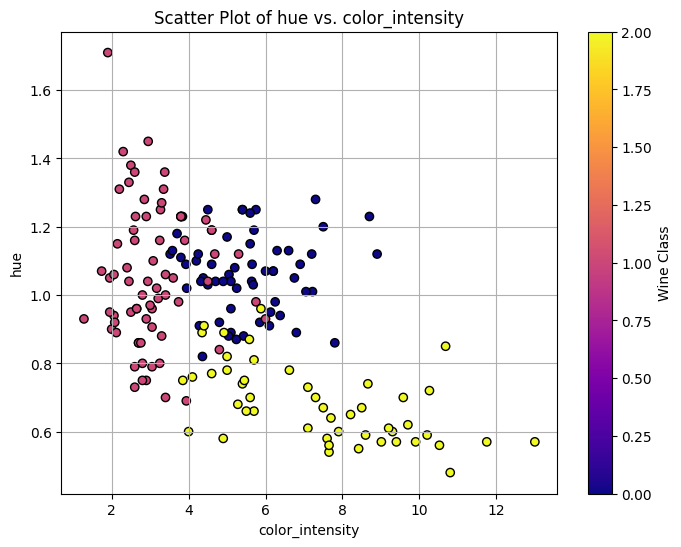

In [12]:
# Second scatter plot - new feature pair
x2 = 'color_intensity'
y2 = 'hue'

plt.figure(figsize=(8, 6))
scatter2 = plt.scatter(df[x2], df[y2], c=df['class'], cmap='plasma', edgecolors='k')

plt.xlabel(x2)
plt.ylabel(y2)
plt.title(f'Scatter Plot of {y2} vs. {x2}')
plt.colorbar(scatter2, label='Wine Class')
plt.grid(True)
plt.show()